# Projeto: SmartBackorder: Análise e Predição de BackOrders de Produtos

#### Etapa 01: Conhecer, Preparar e Limpar os Dados (análise preliminar de Features)
- BackOrders_Etapa01_Cleaning-Data-Train.ipynb
- BackOrders_Etapa01_Cleaning-Data-Test.ipynb

#### Etapa 02: Análise mais detalhada de Features
- BackOrders_Etapa02_EDA-Trend-Analysis-Train.ipynb
- BackOrders_Etapa02_EDA-Trend-Analysis-Test.ipynb

#### Etapa 03: Geração de Modelos e Avaliação dos Resultados
- BackOrders_Etapa03_Model-Fit-Validation.ipynb

#### Etapa 04: Tuning/Calibração de Modelos e Reavaliação dos Resultados
- BackOrders_Etapa04_TuningGradientBoostingModel.ipynb

### Etapa 01: Conhecer, Preparar e Limpar os Dados (análise preliminar de Features)

Etapa 1 - Objetivos:
- Análise dos Tipos de Dados
- Dados faltantes, inválidos ou nulos
- Linhas repetidas
- Outliers
- Gerar novo arquivo com os dados resultantes (visando a próxima etapa)

# Referência: 
Can You Predict Product Backorders?
https://www.kaggle.com/tiredgeek/predict-bo-trial

# Dataset:
https://www.kaggle.com/tiredgeek/predict-bo-trial/data

(*) Obs: visando preservar os dados em caso de mudanças na estrutura do desafio, armazenado na plataforma Kaggle, os dados foram movidos e estão disponíveis no repositório Github do projeto, em formato ZIP devido à limitação imposta pelo repositório:
https://github.com/TorresJLST/br-machine-learning/tree/master/projects/capstone/SmartBackorders/data
ou
https://bit.ly/2DQIE53

# Contexto
Atrasos de peças é um problema comum da cadeia de suprimentos.
Trabalhando para identificar peças em risco de atraso antes do evento, então o negócio tem tempo para reagir.

# Conteúdo do Dataset
O arquivo de dados de treinamento contém os dados históricos para as 8 semanas anteriores à semana que estamos tentando prever. 

Os dados foram coletados como instantâneos semanais no início de cada semana. 

As colunas são definidas da seguinte forma:
- sku - Random ID for the product (chave de identificação de produto)
- national_inv - Current inventory level for the part (estoque atual)
- lead_time - Transit time for product (if available) (tempo de tranporte do fornecedor)
- in_transit_qty - Amount of product in transit from source (quantidade em transporte no momento)
- forecast_3_month - Forecast sales for the next 3 months (previsão de vendas - próximos 3 meses)
- forecast_6_month - Forecast sales for the next 6 months (previsão de vendas - próximos 6 meses)
- forecast_9_month - Forecast sales for the next 9 months (previsão de vendas - próximos 9 meses)
- sales_1_month - Sales quantity for the prior 1 month time period (quantidade vendida - último mês)
- sales_3_month - Sales quantity for the prior 3 month time period (quantidade vendida - últimos 3 meses)
- sales_6_month - Sales quantity for the prior 6 month time period (quantidade vendida - últimos 6 meses)
- sales_9_month - Sales quantity for the prior 9 month time period (quantidade vendida - últimos 6 meses)
- min_bank - Minimum recommend amount to stock (quantidade de estoque mínima recomendada)
- potential_issue - Source issue for part identified (problema de origem para parte identificada)
- pieces_past_due - Parts overdue from source (partes atrasadas da fonte)
- perf_6_month_avg - Source performance for prior 6 month period (desempenho da fonte para o período anterior de 6 meses)
- perf_12_month_avg - Source performance for prior 12 month period (desempenho da fonte para o período anterior de 12 meses)
- local_bo_qty - Amount of stock orders overdue (quantidade de pedidos atrasados)
- deck_risk - Part risk flag (indicativo de risco)
- oe_constraint - Part risk flag (indicativo de risco)
- ppap_risk - Part risk flag (indicativo de risco)
- stop_auto_buy - Part risk flag (indicativo de risco)
- rev_stop - Part risk flag (indicativo de risco)
- went_on_backorder - Product actually went on backorder. This is the target value. (o produto realmente entrou em ordem. Este é o valor alvo.)

### Pacotes utilizados:
- Pandas - Python Data Analysis Library
	- pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
	- http://pandas.pydata.org
- NumPy
	- NumPy is the fundamental package for scientific computing with Python. It contains among other things:
		- a powerful N-dimensional array object
		- sophisticated (broadcasting) functions
		- tools for integrating C/C++ and Fortran code
		- useful linear algebra, Fourier transform, and random number capabilities
    - http://www.numpy.org/
- Matplotlib	
    - Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.
    - https://matplotlib.org/
- Seaborn: Statistical Data Visualization
    - Seaborn is a Python visualization library based on matplotlib. 
    - It provides a high-level interface for drawing attractive statistical graphics.
    - https://seaborn.pydata.org/

In [1]:
# importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#...the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 
#http://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

In [2]:
#carregando datasets
# treino
#df = pd.read_csv('data/Kaggle_Training_Dataset_v2.csv')
# teste
df = pd.read_csv('data/Kaggle_Test_Dataset_v2.csv')
data_frame = df

In [3]:
# listando as colunas
data_frame.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [4]:
# listando os dados do início do dataset
data_frame.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
1,3285131,9,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,No,No,Yes,No,No,No
2,3285358,17,8.0,0,0,0,0,0,0,0,...,0,0.92,0.95,0,No,No,No,Yes,No,No
3,3285517,9,2.0,0,0,0,0,0,0,0,...,0,0.78,0.75,0,No,No,Yes,Yes,No,No
4,3285608,2,8.0,0,0,0,0,0,0,0,...,0,0.54,0.71,0,No,No,No,Yes,No,No


In [5]:
# dimensões (linhas x colunas)
data_frame.shape

(242075, 23)

In [6]:
# listando os dados do final do dataset
data_frame.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242070,3526987,12,12.0,0,0,0,0,0,0,0,...,0,0.48,0.48,0,Yes,No,No,Yes,No,No
242071,3526988,13,12.0,0,0,0,0,0,0,0,...,0,0.48,0.48,0,Yes,No,No,Yes,No,No
242072,3526989,13,12.0,0,0,0,0,0,0,0,...,0,0.48,0.48,0,Yes,No,No,Yes,No,No
242073,3526990,10,12.0,0,0,0,0,0,0,0,...,0,0.48,0.48,0,Yes,No,No,Yes,No,No
242074,3526991,2913,12.0,0,0,0,0,0,30,88,...,0,0.48,0.48,0,Yes,No,No,Yes,No,No


In [7]:
# infornmações gerais sobre o dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242075 entries, 0 to 242074
Data columns (total 23 columns):
sku                  242075 non-null int64
national_inv         242075 non-null int64
lead_time            227351 non-null float64
in_transit_qty       242075 non-null int64
forecast_3_month     242075 non-null int64
forecast_6_month     242075 non-null int64
forecast_9_month     242075 non-null int64
sales_1_month        242075 non-null int64
sales_3_month        242075 non-null int64
sales_6_month        242075 non-null int64
sales_9_month        242075 non-null int64
min_bank             242075 non-null int64
potential_issue      242075 non-null object
pieces_past_due      242075 non-null int64
perf_6_month_avg     242075 non-null float64
perf_12_month_avg    242075 non-null float64
local_bo_qty         242075 non-null int64
deck_risk            242075 non-null object
oe_constraint        242075 non-null object
ppap_risk            242075 non-null object
stop_auto_buy      

In [8]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
# Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
data_frame.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,2.420750e+05,2.420750e+05,227351.000000,242075.000000,2.420750e+05,2.420750e+05,2.420750e+05,242075.000000,2.420750e+05,2.420750e+05,2.420750e+05,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000
mean,3.405957e+06,4.997510e+02,7.923018,36.178213,1.814723e+02,3.488073e+02,5.082963e+02,51.478195,1.721393e+02,3.404254e+02,5.117754e+02,52.804693,1.824236,-7.093779,-6.632445,0.843726
std,6.988118e+04,2.928039e+04,7.041410,898.673127,5.648875e+03,1.008180e+04,1.410972e+04,1544.678350,5.164244e+03,9.386523e+03,1.397670e+04,1278.591177,178.679263,26.900636,26.160720,45.606626
min,3.284920e+06,-2.541400e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,3.345438e+06,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.630000,0.660000,0.000000
50%,3.405957e+06,1.500000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,2.000000e+00,4.000000e+00,0.000000,0.000000,0.820000,0.810000,0.000000
75%,3.466476e+06,8.100000e+01,9.000000,0.000000,4.000000e+00,1.200000e+01,2.000000e+01,4.000000,1.400000e+01,3.000000e+01,4.600000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,3.526994e+06,1.214579e+07,52.000000,265272.000000,1.510592e+06,2.157024e+06,3.162260e+06,349620.000000,1.099852e+06,2.103389e+06,3.195211e+06,303713.000000,79964.000000,1.000000,1.000000,6232.000000


In [9]:
data_frame.describe(include=['object'])

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,242075,242075,242075,242075,242075,242075,242075
unique,2,2,2,2,2,2,2
top,No,No,No,No,Yes,No,No
freq,241993,194105,242028,213357,232617,241967,239387


In [10]:
# verificação de nulls
data_frame.isnull().sum()

sku                      0
national_inv             0
lead_time            14724
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
potential_issue          0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
went_on_backorder        0
dtype: int64

In [11]:
# "sku" (stock keeping unit) é a chave de identificação de produto.
# temos chaves duplicadas ?
data_frame.sku.duplicated().sum()

0

In [12]:
# "sku" (stock keeping unit) é a chave de identificação de produto.
data_frame = data_frame.set_index('sku')
data_frame.tail()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,
3526987,12,12.0,0,0,0,0,0,0,0,0,...,0,0.48,0.48,0,Yes,No,No,Yes,No,No
3526988,13,12.0,0,0,0,0,0,0,0,0,...,0,0.48,0.48,0,Yes,No,No,Yes,No,No
3526989,13,12.0,0,0,0,0,0,0,0,0,...,0,0.48,0.48,0,Yes,No,No,Yes,No,No
3526990,10,12.0,0,0,0,0,0,0,0,0,...,0,0.48,0.48,0,Yes,No,No,Yes,No,No
3526991,2913,12.0,0,0,0,0,0,30,88,88,...,0,0.48,0.48,0,Yes,No,No,Yes,No,No


In [13]:
# separando os tipos de dados
int_cols = []
float_cols = []
object_cols = []

In [14]:
# separando os tipos de dados e verificando valores máximos
for col, dtype in zip(data_frame.columns, data_frame.dtypes):
    if dtype == np.int64:
        int_cols.append(col)
        print(max(data_frame[col]), '\t', col)

print('\n')

12145792 	 national_inv
265272 	 in_transit_qty
1510592 	 forecast_3_month
2157024 	 forecast_6_month
3162260 	 forecast_9_month
349620 	 sales_1_month
1099852 	 sales_3_month
2103389 	 sales_6_month
3195211 	 sales_9_month
303713 	 min_bank
79964 	 pieces_past_due
6232 	 local_bo_qty




In [15]:
# separando os tipos de dados e verificando valores máximos
for col, dtype in zip(data_frame.columns, data_frame.dtypes):
    if dtype == np.float64:
        float_cols.append(col)
        print(max(data_frame[col]), '\t', col)
        
print('\n')

nan 	 lead_time
1.0 	 perf_6_month_avg
1.0 	 perf_12_month_avg




In [16]:
# separando os tipos de dados
for col, dtype in zip(data_frame.columns, data_frame.dtypes):
    if dtype == object:
        object_cols.append(col)
        print(col)
        
print('\n')

potential_issue
deck_risk
oe_constraint
ppap_risk
stop_auto_buy
rev_stop
went_on_backorder




In [17]:
print('\n', 'int_cols: ', int_cols, '\n')
print('\n', 'float_cols: ', float_cols, '\n')
print('\n', 'object_cols: ', object_cols, '\n')


 int_cols:  ['national_inv', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'local_bo_qty'] 


 float_cols:  ['lead_time', 'perf_6_month_avg', 'perf_12_month_avg'] 


 object_cols:  ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'] 



In [18]:
# verificando um pouco mais os dados, agora por tipo (início do sub-conjunto)
data_frame[int_cols].head()

,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,local_bo_qty
sku,,,,,,,,,,,,
3285085,62,0,0,0,0,0,0,0,0,1,0,0
3285131,9,0,0,0,0,0,0,0,0,1,0,0
3285358,17,0,0,0,0,0,0,0,0,0,0,0
3285517,9,0,0,0,0,0,0,0,2,0,0,0
3285608,2,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# verificando um pouco mais os dados, agora por tipo (final do sub-conjunto)
data_frame[int_cols].tail()

,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,local_bo_qty
sku,,,,,,,,,,,,
3526987,12,0,0,0,0,0,0,0,0,1,0,0
3526988,13,0,0,0,0,0,0,0,0,1,0,0
3526989,13,0,0,0,0,0,0,0,0,1,0,0
3526990,10,0,0,0,0,0,0,0,0,1,0,0
3526991,2913,0,0,0,0,0,30,88,88,4,0,0


In [20]:
# verificando um pouco mais os dados, agora por tipo (início do sub-conjunto)
data_frame[float_cols].head()

,lead_time,perf_6_month_avg,perf_12_month_avg
sku,,,
3285085,NaN,-99.00,-99.00
3285131,NaN,-99.00,-99.00
3285358,8.0,0.92,0.95
3285517,2.0,0.78,0.75
3285608,8.0,0.54,0.71


In [21]:
# verificando um pouco mais os dados, agora por tipo (final do sub-conjunto)
data_frame[float_cols].tail()

,lead_time,perf_6_month_avg,perf_12_month_avg
sku,,,
3526987,12.0,0.48,0.48
3526988,12.0,0.48,0.48
3526989,12.0,0.48,0.48
3526990,12.0,0.48,0.48
3526991,12.0,0.48,0.48


In [22]:
# verificando um pouco mais os dados, agora por tipo (início do sub-conjunto)
data_frame[object_cols].head()

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,
3285085,No,Yes,No,No,Yes,No,No
3285131,No,No,No,Yes,No,No,No
3285358,No,No,No,No,Yes,No,No
3285517,No,No,No,Yes,Yes,No,No
3285608,No,No,No,No,Yes,No,No


In [23]:
# verificando um pouco mais os dados, agora por tipo (final do sub-conjunto)
data_frame[object_cols].tail()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,
3526987,No,Yes,No,No,Yes,No,No
3526988,No,Yes,No,No,Yes,No,No
3526989,No,Yes,No,No,Yes,No,No
3526990,No,Yes,No,No,Yes,No,No
3526991,No,Yes,No,No,Yes,No,No


## Tratamento para dados faltantes, inválidos ou nulos
- "lead_time", "perf_6_month_avg", "perf_12_month_avg" contém dados faltantes, inválidos ou nulos. (NaN or -99.00)
- usar "sklearn.preprocessing.Imputer" para preencher com novos valores
    - http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html
- algumas possíveis estratégias: deleção, imputação (média, media, regressão linear), under/over sampling.
    - verificar: "Welcome to imbalanced-learn documentation!"
        - http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html
    - verificar: "Missing Data Conundrum: Exploration and Imputation Techniques - Why Missing Data"
        - https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87
    - verificar: "Missing data visualization module for Python"
        - https://github.com/ResidentMario/missingno

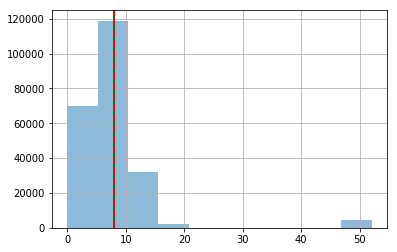

Mediana para lead_time: 8.0
Média para lead_time  : 7.923017712699746


In [24]:
#Analisando "lead_time"

plt.figure(1)
data_frame.lead_time.hist(alpha=0.5)
plt.axvline(data_frame.lead_time.median(), 
            color="green", 
            linewidth=2.0)
plt.axvline(data_frame.lead_time.mean(), 
            color="red", 
            linestyle='dashed', 
            linewidth=2.0)
plt.show()
print("Mediana para lead_time: {}".format(data_frame.lead_time.median()))
print("Média para lead_time  : {}".format(data_frame.lead_time.mean()))

In [25]:
# "lead_time" -> mediana
from sklearn.preprocessing import Imputer
data_frame['lead_time'] = Imputer(strategy='median').fit_transform(data_frame['lead_time'].values.reshape(-1,1))

#verificação
data_frame.lead_time.isnull().sum()

0

In [26]:
data_frame['lead_time'].value_counts()

8.0     113257
2.0      46917
12.0     29297
4.0      18508
9.0      17774
52.0      4305
3.0       2349
10.0      2056
0.0       1515
14.0      1506
16.0      1289
13.0       755
5.0        578
15.0       543
17.0       537
6.0        461
11.0       152
20.0        61
30.0        44
24.0        33
18.0        32
7.0         30
22.0        19
26.0        15
28.0        12
40.0         8
21.0         7
35.0         5
19.0         4
1.0          3
23.0         2
25.0         1
Name: lead_time, dtype: int64

In [27]:
#verificação
data_frame.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

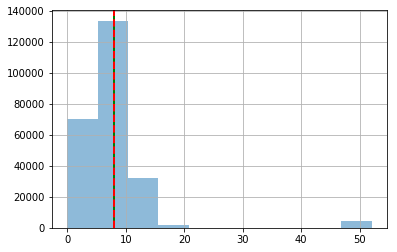

Mediana para lead_time: 8.0
Média para lead_time  : 7.9277000929464005


In [28]:
#Analisando "lead_time" (após tratamento de dados faltantes/inválidos)

plt.figure(1)
data_frame.lead_time.hist(alpha=0.5)
plt.axvline(data_frame.lead_time.median(), 
            color="green", 
            linewidth=2.0)
plt.axvline(data_frame.lead_time.mean(), 
            color="red", 
            linestyle='dashed', 
            linewidth=2.0)
plt.show()
print("Mediana para lead_time: {}".format(data_frame.lead_time.median()))
print("Média para lead_time  : {}".format(data_frame.lead_time.mean()))

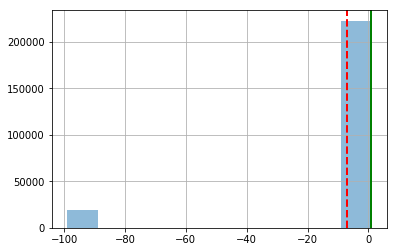

Mediana para perf_6_month_avg: 0.82
Média para perf_6_month_avg  : -7.093778787571598


In [29]:
#Analisando "perf_6_month_avg"

plt.figure(1)
data_frame.perf_6_month_avg.hist(alpha=0.5)
plt.axvline(data_frame.perf_6_month_avg.median(), 
            color="green", 
            linewidth=2.0)
plt.axvline(data_frame.perf_6_month_avg.mean(), 
            color="red", 
            linestyle='dashed', 
            linewidth=2.0)
plt.show()
print("Mediana para perf_6_month_avg: {}".format(data_frame.perf_6_month_avg.median()))
print("Média para perf_6_month_avg  : {}".format(data_frame.perf_6_month_avg.mean()))

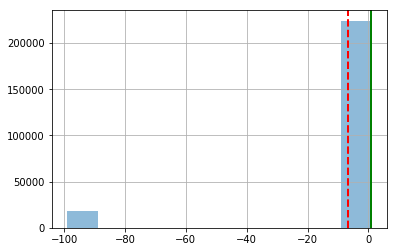

Mediana para perf_12_month_avg: 0.81
Média para perf_12_month_avg  : -6.63244506868091


In [30]:
#Analisando "perf_12_month_avg"

plt.figure(2)
data_frame.perf_12_month_avg.hist(alpha=0.5)
plt.axvline(data_frame.perf_12_month_avg.median(), 
            color="green", 
            linewidth=2.0)
plt.axvline(data_frame.perf_12_month_avg.mean(), 
            color="red", 
            linestyle='dashed', 
            linewidth=2.0)
plt.show()
print("Mediana para perf_12_month_avg: {}".format(data_frame.perf_12_month_avg.median()))
print("Média para perf_12_month_avg  : {}".format(data_frame.perf_12_month_avg.mean()))

In [31]:
# "perf_6_month_avg" e "perf_12_month_avg" -> média
for col in ['perf_6_month_avg', 'perf_12_month_avg']:
        data_frame[col] = Imputer(missing_values=-99, strategy='mean').fit_transform(data_frame[col].values.reshape(-1, 1))

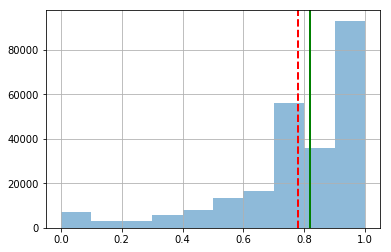

Mediana para perf_6_month_avg : 0.82
Média para perf_6_month_avg : 0.7793397436481182


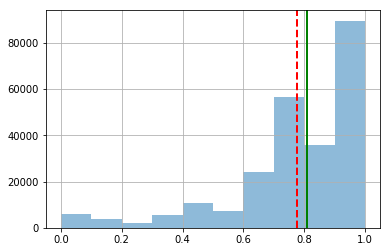

Mediana para perf_12_month_avg : 0.81
Média para perf_12_month_avg : 0.7763313699239661


In [32]:
#Analisando "perf_6_month_avg" (após tratamento de dados faltantes/inválidos)

plt.figure(1)
data_frame.perf_6_month_avg.hist(alpha=0.5)
plt.axvline(data_frame.perf_6_month_avg.median(), 
            color="green", 
            linewidth=2.0)
plt.axvline(data_frame.perf_6_month_avg.mean(), 
            color="red", 
            linestyle='dashed', 
            linewidth=2.0)
plt.show()
print("Mediana para perf_6_month_avg : {}".format(data_frame.perf_6_month_avg.median()))
print("Média para perf_6_month_avg : {}".format(data_frame.perf_6_month_avg.mean()))


#Analisando "perf_12_month_avg" (após tratamento de dados faltantes/inválidos)

plt.figure(2)
data_frame.perf_12_month_avg.hist(alpha=0.5)
plt.axvline(data_frame.perf_12_month_avg.median(), 
            color="green", 
            linewidth=2.0)
plt.axvline(data_frame.perf_12_month_avg.mean(), 
            color="red", 
            linestyle='dashed', 
            linewidth=2.0)
plt.show()
print("Mediana para perf_12_month_avg : {}".format(data_frame.perf_12_month_avg.median()))
print("Média para perf_12_month_avg : {}".format(data_frame.perf_12_month_avg.mean()))

In [33]:
# Valores "Yes" / "No" -> transformar em "1" / "0"
# colunas com tipo de dados "object", lembrando que "sku"(também "object") é a chave de identificação de produto, assim sendo, 
# não será modificado

#visualização: "Yes" / "No"
data_frame[object_cols].tail()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,
3526987,No,Yes,No,No,Yes,No,No
3526988,No,Yes,No,No,Yes,No,No
3526989,No,Yes,No,No,Yes,No,No
3526990,No,Yes,No,No,Yes,No,No
3526991,No,Yes,No,No,Yes,No,No


In [34]:
# Valores "Yes" / "No" -> transformar em "1" / "0"
# colunas com tipo de dados "object", lembrando que "sku"(também "object") é a chave de identificação de produto, assim sendo, 
# não será modificado

for i in object_cols:
    data_frame[i] = (data_frame[i] == 'Yes').astype(int)
    
#verificação
data_frame[object_cols].tail()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,
3526987,0,1,0,0,1,0,0
3526988,0,1,0,0,1,0,0
3526989,0,1,0,0,1,0,0
3526990,0,1,0,0,1,0,0
3526991,0,1,0,0,1,0,0


## Analisando "went_on_backorder" (target)
- indica se o produto ficou em backorder ou não.
- possui valores 1 ou 0 (sim ou  não)

In [35]:
print("Items backorder = NÃO, Classe 0: {}".format(data_frame.went_on_backorder.value_counts()[0]))
print("Items backorder = SIM, Classe 1: {}".format(data_frame.went_on_backorder.value_counts()[1]))

#verificação
data_frame.went_on_backorder.value_counts()

Items backorder = NÃO, Classe 0: 239387
Items backorder = SIM, Classe 1: 2688


0    239387
1      2688
Name: went_on_backorder, dtype: int64

Proporção backorder = NÃO, Classe 0: 98.88960033047609%
Proporção backorder = SIM, Classe 1: 1.1103996695239078%


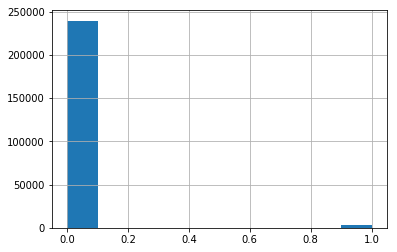

In [36]:
# analisando a proporção de backorder (SIM/NÃO)

print("Proporção backorder = NÃO, Classe 0: {}%".format(100*data_frame.went_on_backorder.value_counts()[0]/len(data_frame.went_on_backorder)))
print("Proporção backorder = SIM, Classe 1: {}%".format(100*data_frame.went_on_backorder.value_counts()[1]/len(data_frame.went_on_backorder)))
data_frame.went_on_backorder.hist()
plt.show()

### Nota: Classes (target) muito desbalanceadas. Acurária não será uma boa métrica de validação.

### Analisando correlações

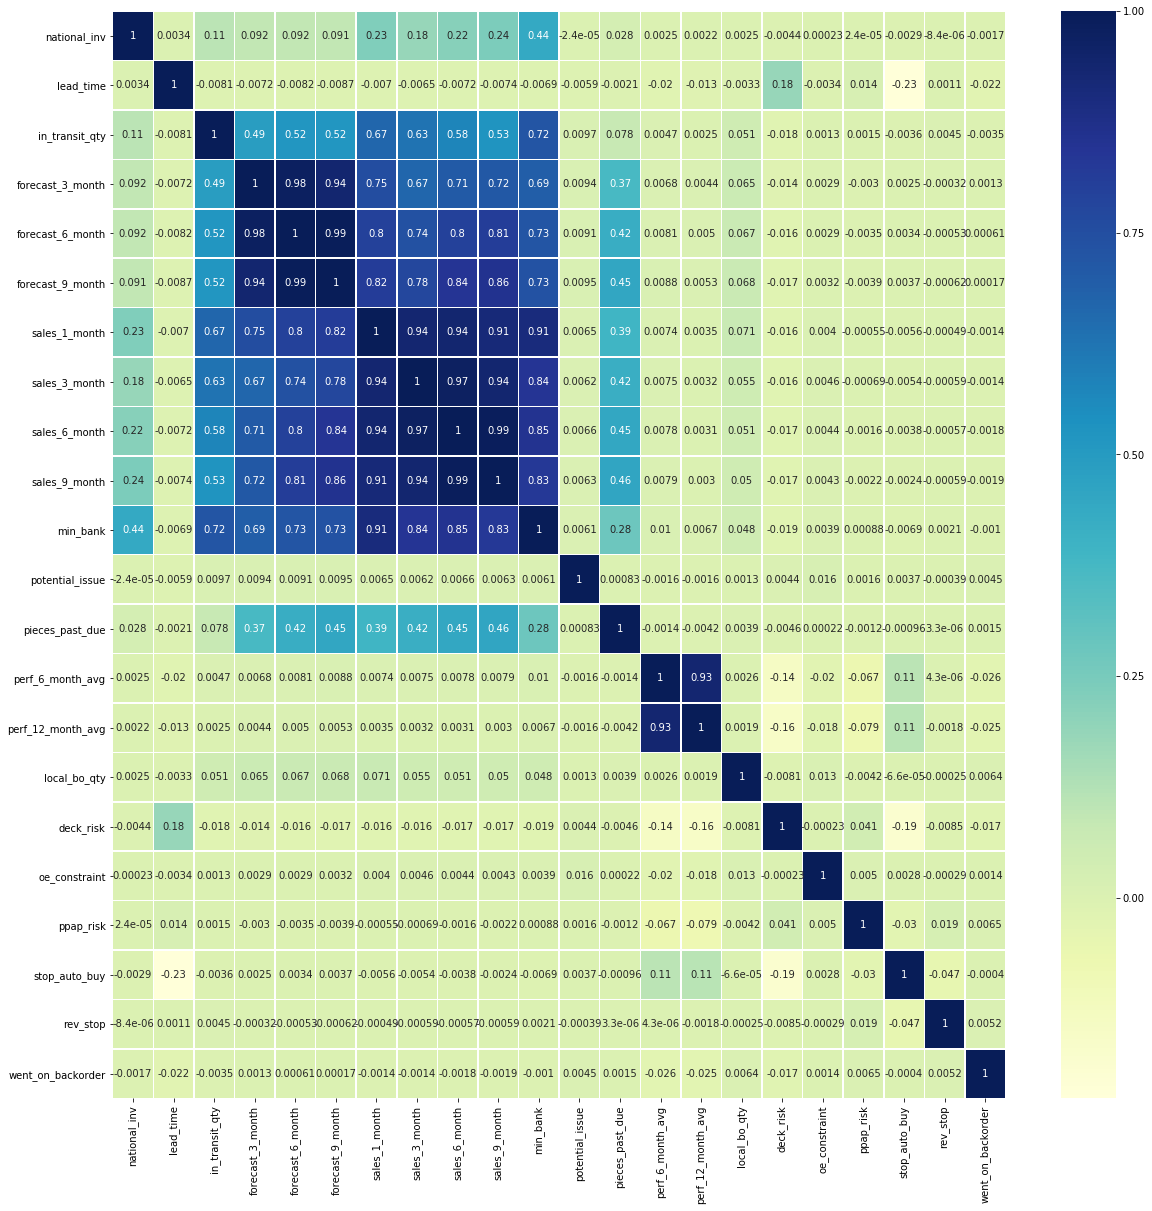

In [37]:
# Analisando correlações (visualização com números)

fig, ax = plt.subplots(figsize=(20,20))
col_corr =data_frame.corr()
sns.heatmap(col_corr, annot=True, linewidths=.5, cmap="YlGnBu")

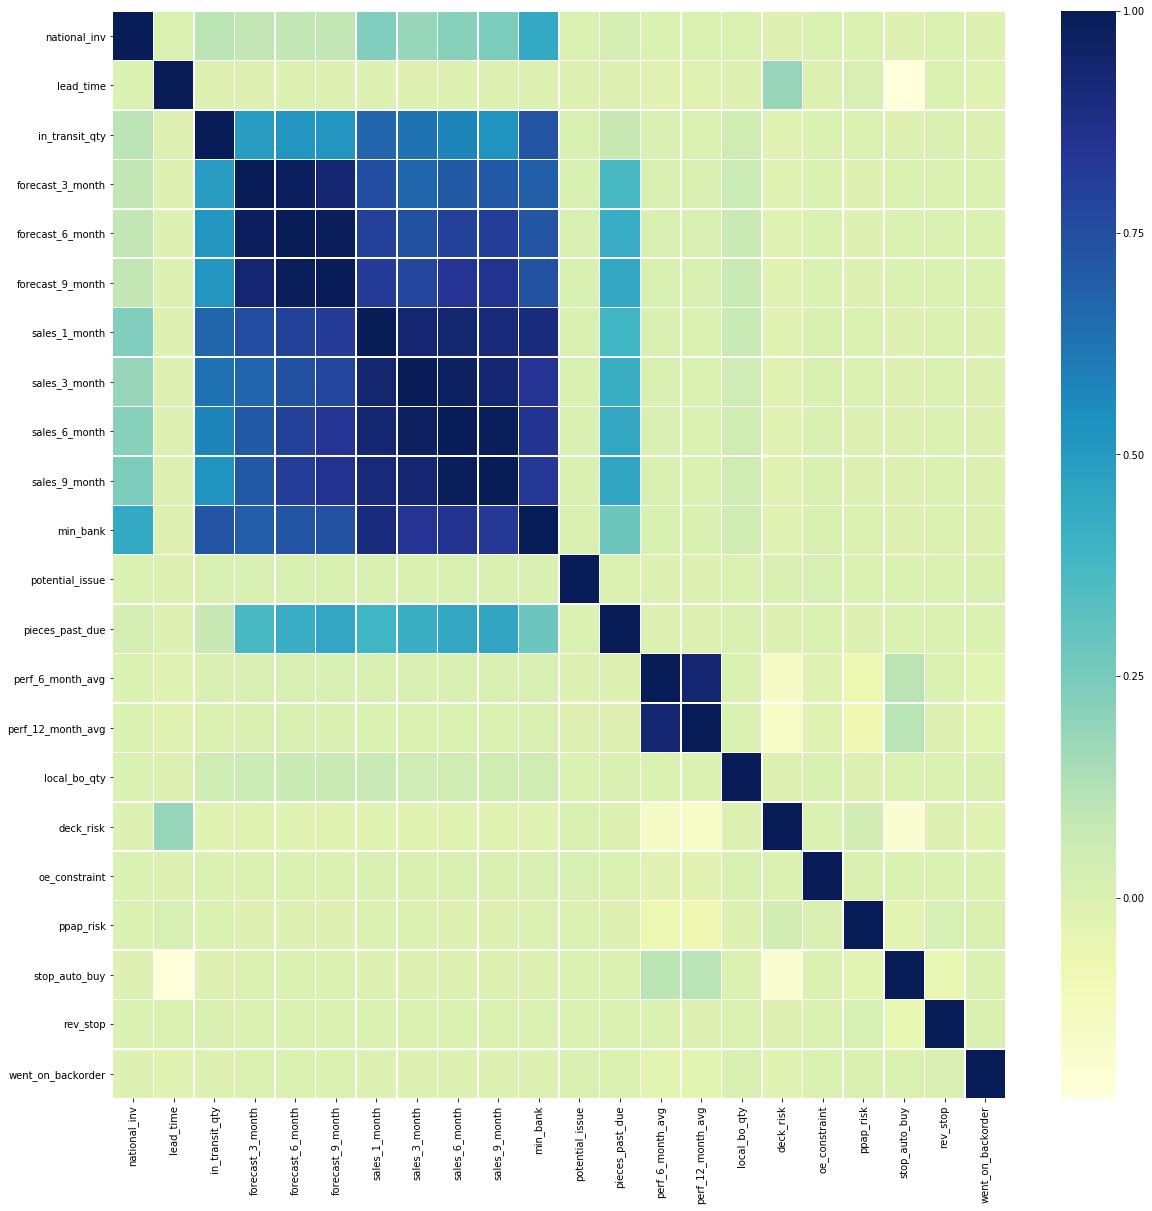

In [38]:
# Analisando correlações (visualização sem números)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(col_corr, annot=False, linewidths=.5, cmap="YlGnBu")

### Nota: Analisando as classes "went_on_backorder" (target), não há uma (boa ou forte) correlação, seja positiva ou negativa (1 ou -1) com as demais Features (vide a útima coluna da direita).
Interpretação do coeficiente de correlação ($r$):
- O valor de $r$ está sempre entre $-1$ e $+1$, com $r=0$ correspondendo à não associação. 
- Valor positivo: diretamente proporcional
- Valor negativo: inversamente proporcional

In [39]:
# Após limpeza, analisar novamente o Dataset
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
# Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
data_frame.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,2.420750e+05,242075.000000,242075.000000,2.420750e+05,2.420750e+05,2.420750e+05,242075.000000,2.420750e+05,2.420750e+05,2.420750e+05,...,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000
mean,4.997510e+02,7.927700,36.178213,1.814723e+02,3.488073e+02,5.082963e+02,51.478195,1.721393e+02,3.404254e+02,5.117754e+02,...,1.824236,0.779340,0.776331,0.843726,0.198162,0.000194,0.118633,0.960929,0.000446,0.011104
std,2.928039e+04,6.823931,898.673127,5.648875e+03,1.008180e+04,1.410972e+04,1544.678350,5.164244e+03,9.386523e+03,1.397670e+04,...,178.679263,0.229435,0.223334,45.606626,0.398615,0.013933,0.323356,0.193763,0.021117,0.104789
min,-2.541400e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.730000,0.710000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.500000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,2.000000e+00,4.000000e+00,...,0.000000,0.820000,0.810000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.100000e+01,8.000000,0.000000,4.000000e+00,1.200000e+01,2.000000e+01,4.000000,1.400000e+01,3.000000e+01,4.600000e+01,...,0.000000,0.960000,0.950000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.214579e+07,52.000000,265272.000000,1.510592e+06,2.157024e+06,3.162260e+06,349620.000000,1.099852e+06,2.103389e+06,3.195211e+06,...,79964.000000,1.000000,1.000000,6232.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
data_frame[object_cols].describe()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000
mean,0.000339,0.198162,0.000194,0.118633,0.960929,0.000446,0.011104
std,0.018402,0.398615,0.013933,0.323356,0.193763,0.021117,0.104789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


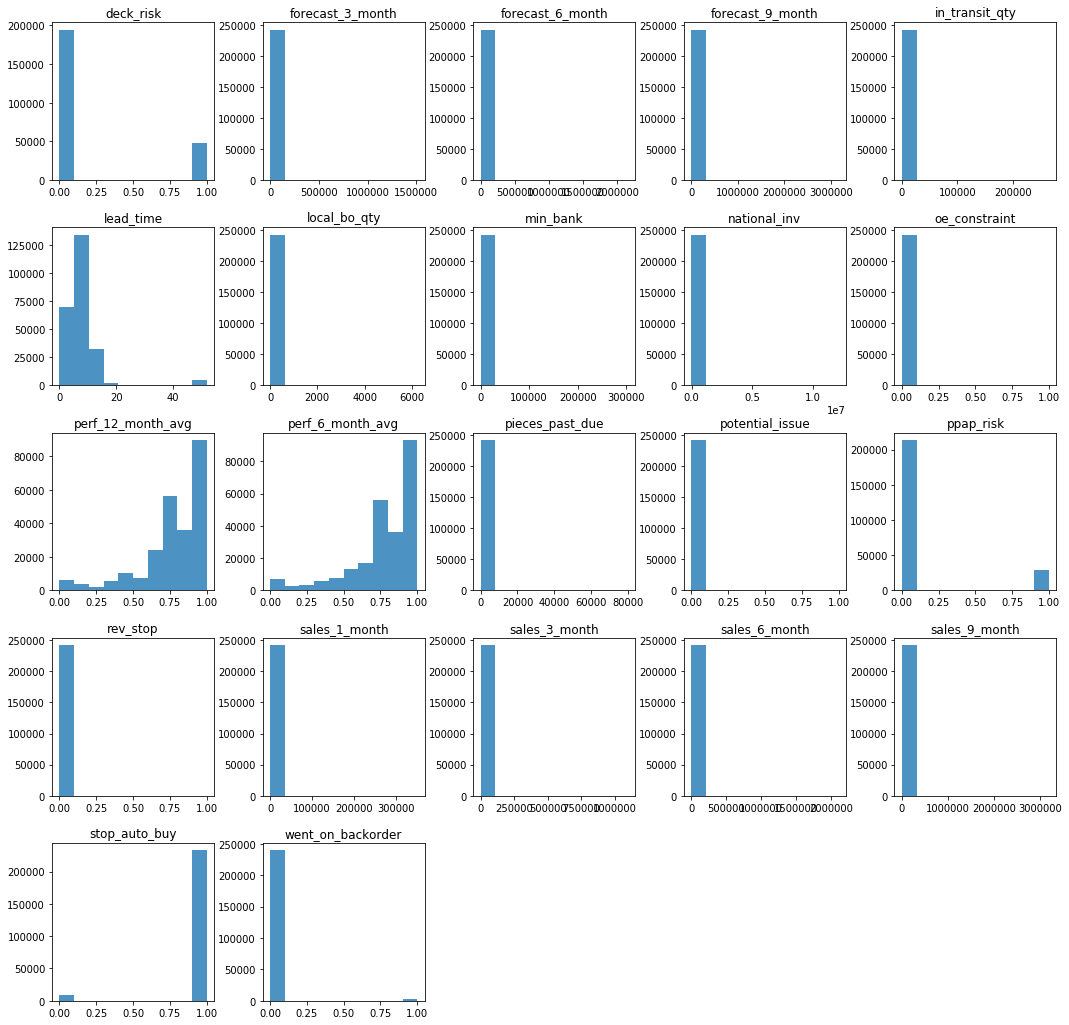

In [41]:
#analisar as Features como um todo visando possível normalização

data_frame.hist(figsize=(18,18), alpha=0.8, grid=False)
plt.show()

Features quantitativas:
- national_inv
- in_transit_qty
- forecast_3_month
- forecast_6_month
- forecast_9_month
- min_bank
- local_bo_qty
- pieces_past_due
- sales_1_month
- sales_3_month
- sales_6_month
- sales_9_month

Serão normalizadas visando melhor visualização.

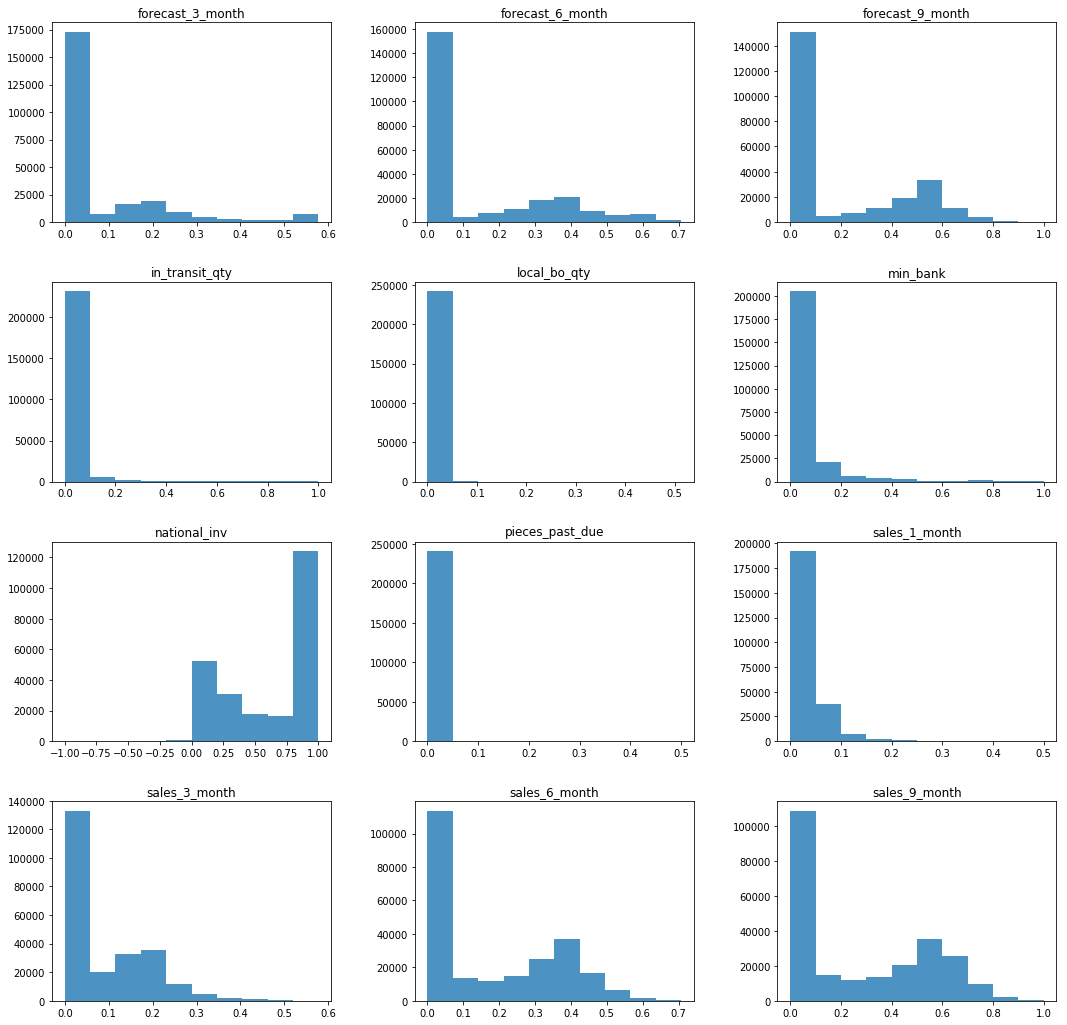

In [42]:
# nova visualização
features_quantitativas = ['national_inv', 'in_transit_qty', 'forecast_3_month', 
            'forecast_6_month', 'forecast_9_month', 'min_bank', 
            'local_bo_qty', 'pieces_past_due', 'sales_1_month', 
            'sales_3_month', 'sales_6_month', 'sales_9_month']

from sklearn.preprocessing import normalize
data_frame[features_quantitativas] = normalize(data_frame[features_quantitativas], axis=1)
data_frame[features_quantitativas].hist(figsize=(18,18), alpha=0.8, grid=False)
plt.show()

### Nota: Analisando as Features de Vendas (passadas e previsões) e Estoque Mínimo Recomendado versus Estoque Atual:
- Há um possível problema aqui: vendas (passadas e previsões) e estoque mínimo recomendado ("min_bank") com valores baixos (muitos "0").
    - Outliers ?
    - Dados desatualizados ?
- Esta parte será revista na "Etapa 02: Análise mais detalhada de Features"

In [43]:
# salvando o dataset resultante da Etapa 1
data_frame.to_csv('data/Backorder_Teste_clean.csv')

### Fim -> "Etapa 01: Conhecer, Preparar e Limpar os Dados (análise preliminar de Features)"